<a href="https://colab.research.google.com/github/Michaelawosika1/Data-Analysis-Projects/blob/main/CUSTOMERS_CHURN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  importing necessary and important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
#   Loading the datasets and preparation

#Loading datasets
df = pd.read_excel("/content/Customers churn datasets cleaning for a bank.xlsx")
print(df.head(10))

   CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave          619    France  Female  42.0       2   
1    15647311      Hill          608     Spain  Female  41.0       1   
2    15619304      Onio          502    France  Female  42.0       8   
3    15701354      Boni          699    France  Female  39.0       1   
4    15737888  Mitchell          850     Spain  Female  43.0       2   
5    15574012       Chu          645     Spain    Male  44.0       8   
6    15592531  Bartlett          822    France    Male  50.0       7   
7    15656148    Obinna          376   Germany  Female  29.0       4   
8    15792365        He          501    France    Male  44.0       4   
9    15592389        H?          684    France    Male  27.0       2   

   NumOfProducts HasCrCard  EstimatedSalary    Balance IsActiveMember  Exited  
0              1       Yes        101348.88       0.00            Yes       1  
1              1       Yes        112542.58   8

In [ ]:
#dropping the identifiers
df = df.drop(columns=["CustomerId", "Surname"])

In [ ]:
# encoding the categorical varables
label_enc = LabelEncoder()
for col in ["Geography", "Gender", "HasCrCard", "IsActiveMember"]:
    df[col] = label_enc.fit_transform(df[col])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,EstimatedSalary,Balance,IsActiveMember,Exited
0,619,0,0,42.0,2,1,1,101348.88,0.00,1,1
1,608,2,0,41.0,1,1,1,112542.58,83807.86,1,0
2,502,0,0,42.0,8,3,0,113931.57,159660.80,0,1
3,699,0,0,39.0,1,2,0,93826.63,0.00,0,0
4,850,2,0,43.0,2,1,1,79084.10,125510.82,1,0


Overall churn rate: 20.37%


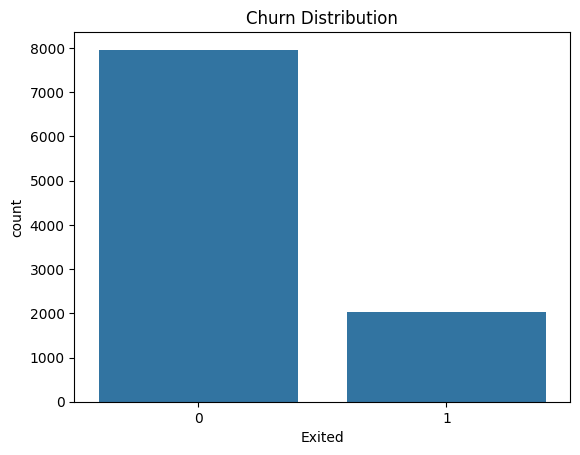

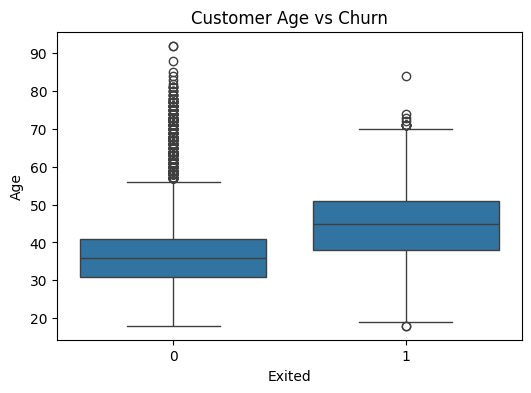

In [ ]:
# Exploratory data analysis
# Churn rate
churn_rate = df["Exited"].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

# Plot churn distribution
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.show()

# Age vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Customer Age vs Churn")
plt.show()


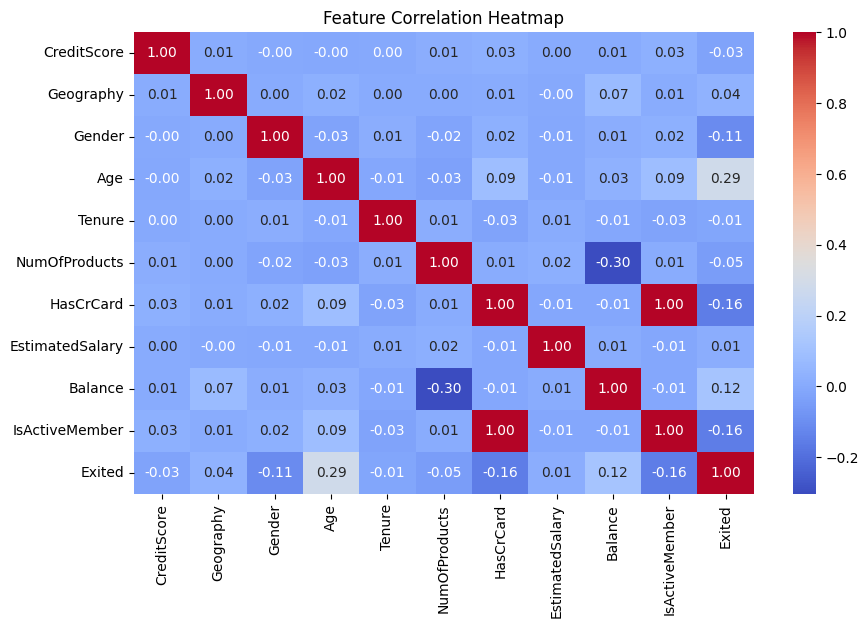

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# statidtical analysis
import scipy.stats as stats

In [ ]:
# calculating T-test forthe age
churned = df[df["Exited"]==1]["Age"]
retained = df[df["Exited"]==0]["Age"]

t_stat, p_val = stats.ttest_ind(churned, retained)
print(f"T-test for Age: t={t_stat:.2f}, p={p_val:.4f}")

# Chi-square for Geography vs Churn
contingency = pd.crosstab(df["Geography"], df["Exited"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square test for Geography: chi2={chi2:.2f}, p={p:.4f}")



T-test for Age: t=nan, p=nan
Chi-square test for Geography: chi2=301.26, p=0.0000


In [ ]:
# estimating for the prediction model

# Handle missing values in the 'Age' column by filling with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.58      0.14      0.23       407

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



/tmp/ipython-input-3035314295.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
# Check for missing values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
Balance            0
IsActiveMember     0
Exited             0
dtype: int64


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

XGBoost Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1593
           1       0.68      0.47      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.83      0.85      0.84      2000



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:38:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


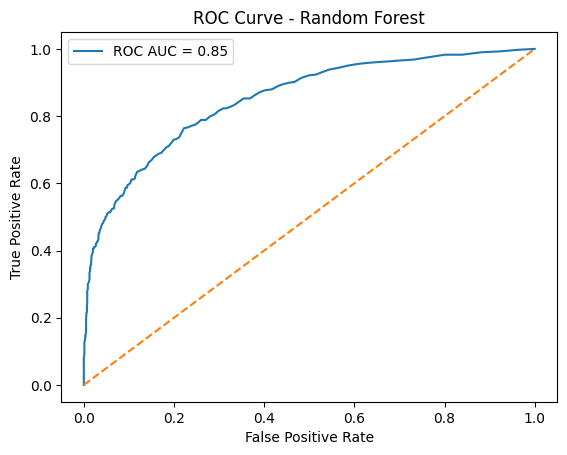

In [ ]:
# ROC Curve (example for Random Forest)
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()